In [1]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.6 MB/s eta 0:00:00


In [2]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requir

In [1]:
pip install sastrawi

# 1. Import Library

In [59]:
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix
from scipy.sparse import hstack
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from datasets import Dataset
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer


import csv
import requests
from io import StringIO
import nltk
import pandas as pd
import re, os,string, numpy as np
import joblib, seaborn as sns, matplotlib.pyplot as plt

# 2. Load Dataset

In [3]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Scrapping/scrapingtokopedia.csv')



In [4]:
# Menampilkan dataframe teratas
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,80ebf9ff-43f3-4db7-b2c9-51175e41608d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga konsisten, promo dll gajelas, dapat promo i...",1,16,3.329.0,2025-09-14 00:41:45,NaN,NaN,3.329.0
1,ff046e7b-613b-43d8-8fda-cfa0bfc5cc49,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"susah komplain,, saya ada mau komplain balikki...",1,13,3.329.0,2025-09-13 21:14:22,NaN,NaN,3.329.0
2,40e370ad-2183-4786-a3f0-49772cea7bdb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf Respon TokopediaCare Buruk!!! Lebih serin...,4,686,3.328.0,2025-09-05 03:12:13,"Halo Toppers, terima kasih atas rating yang ka...",2024-11-23 04:28:01,3.328.0
3,9cf64c5f-0ed8-4af0-aeac-1c9404274e0d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dan akhirnya setelah kira2 hampir 3 tahun saya...,1,7,3.329.0,2025-09-14 05:41:29,NaN,NaN,3.329.0
4,099bae11-3fbf-4a75-8d7a-3d59ccdcbf10,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk tokopedia mohon untuk di perketat soal s...,4,4,3.328.0,2025-09-15 05:35:07,"Hai Toppers, Terima kasih untuk rating yang te...",2022-09-22 04:17:27,3.328.0


In [5]:
# Menampilkan informasi dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81000 entries, 0 to 80999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              81000 non-null  object
 1   userName              81000 non-null  object
 2   userImage             81000 non-null  object
 3   content               81000 non-null  object
 4   score                 81000 non-null  int64 
 5   thumbsUpCount         81000 non-null  int64 
 6   reviewCreatedVersion  57232 non-null  object
 7   at                    81000 non-null  object
 8   replyContent          41354 non-null  object
 9   repliedAt             41354 non-null  object
 10  appVersion            57232 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.8+ MB


In [6]:
# Menampilkan statistik deskriptif
reviews_df.describe()

,score,thumbsUpCount
count,81000.000000,81000.000000
mean,3.184963,7.709222
std,1.827027,78.235459
min,1.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,9904.000000


In [7]:
# Menampilkan jumlah data yang mengandung kolom null
reviews_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,23768
at,0
replyContent,39646
repliedAt,39646


# 3. Data Cleaning

In [8]:
#Dataframe baru hasil data cleaning
df_clean = reviews_df.dropna()

In [9]:
df_clean.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


In [10]:
# Menghapus baris yang mengandung duplikat
df_clean= df_clean.drop_duplicates()

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31545 entries, 2 to 80998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              31545 non-null  object
 1   userName              31545 non-null  object
 2   userImage             31545 non-null  object
 3   content               31545 non-null  object
 4   score                 31545 non-null  int64 
 5   thumbsUpCount         31545 non-null  int64 
 6   reviewCreatedVersion  31545 non-null  object
 7   at                    31545 non-null  object
 8   replyContent          31545 non-null  object
 9   repliedAt             31545 non-null  object
 10  appVersion            31545 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.9+ MB


In [12]:
# Menghitung banyaknya distribusi score pada ulasan
df_clean['score'].value_counts()

,count
score,
1,16916
5,5333
2,3448
3,3276
4,2572


<Axes: ylabel='count'>

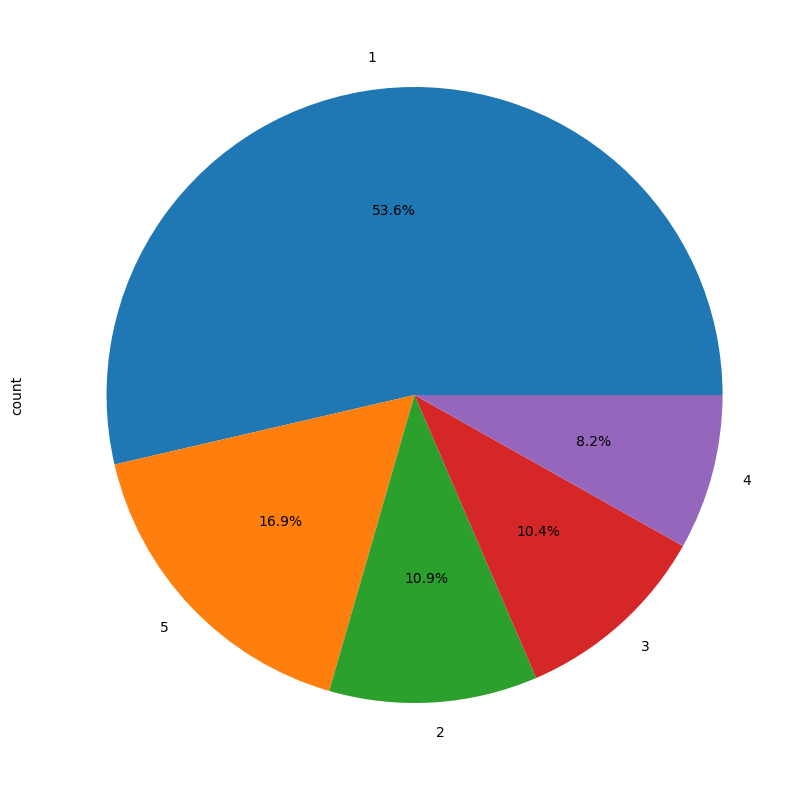

In [13]:
# Vissualisasi distribusi rating score ulasan
df_clean['score'].value_counts().plot(kind='pie',figsize=(10,10), autopct='%1.1f%%')

In [14]:
# Mapping label sentiment
def map_label(score):
    if score in [1,2]:
      return "negatif"
    elif score == 3:
      return "netral"
    elif score in [4,5]:
      return "positif"
    else:
      return None
# Menambahkan kolom label score sebagai sentiment
df_clean['label'] = df_clean['score'].apply(map_label)

In [15]:
df_clean

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,label
2,40e370ad-2183-4786-a3f0-49772cea7bdb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf Respon TokopediaCare Buruk!!! Lebih serin...,4,686,3.328.0,2025-09-05 03:12:13,"Halo Toppers, terima kasih atas rating yang ka...",2024-11-23 04:28:01,3.328.0,positif
4,099bae11-3fbf-4a75-8d7a-3d59ccdcbf10,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk tokopedia mohon untuk di perketat soal s...,4,4,3.328.0,2025-09-15 05:35:07,"Hai Toppers, Terima kasih untuk rating yang te...",2022-09-22 04:17:27,3.328.0,positif
13,87192777-615b-41ff-ad57-008cf627777c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,males belanja di toped ketika ada barang yg ti...,1,29,3.329.0,2025-09-09 23:57:12,"Halo Toppers, terima kasih atas rating yang ka...",2024-10-31 23:40:04,3.329.0,negatif
38,b3bb04f5-b41f-4a80-a917-c3d36ce44f5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tulisan nya plus gratis ongkir sepuasnya, eh p...",1,11,3.329.0,2025-09-11 06:16:33,"Halo Toppers, terima kasih atas rating yang ka...",2023-08-09 03:49:01,3.329.0,negatif
47,86982069-6df4-46a4-93fc-0443598f6d06,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gimana sih ini Tokopedia sekarang?Kelihatannya...,3,12,3.328.0,2025-09-10 11:03:59,Terima kasih sudah mempercayakan Tokopedia seb...,2024-09-02 13:00:21,3.328.0,netral
...,...,...,...,...,...,...,...,...,...,...,...,...
80989,0b4f7906-0e1f-4c56-8041-e97ccc7c0314,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Smakin kesini kurang nyaman soal pe Ngiriman,,...",2,0,3.155,2021-12-19 02:10:20,"Hai Kak Jihan, maaf atas pengalaman bertransak...",2021-12-19 02:31:38,3.155,negatif
80990,8cfe536c-9c95-4c0e-897c-e766ebf24153,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah, terintegrasi lebih banyak, sangat memba...",5,0,3.195,2022-10-22 07:29:46,"Hai Toppers, Terima kasih untuk rating yang te...",2022-10-22 07:57:03,3.195,positif
80996,d4a7afed-c0cc-47aa-940b-f94f1f25f8f3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Respon terhadap pembeli cepat,pelayanan juga c...",5,0,3.52.1,2019-12-10 11:22:34,"Hai Slamet, kami ikut senang ya jika kamu sela...",2020-01-05 07:23:44,3.52.1,positif
80997,15b3a4a1-3f9f-4259-aa54-1e2fe086bf25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tampilan nya enak dilihat dan sangat mudah unt...,5,0,3.182,2022-07-17 02:41:56,"Hai Toppers, Terima kasih untuk rating yang te...",2022-07-17 03:06:03,3.182,positif


/tmp/ipython-input-2928627901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='label', ylabel='count'>

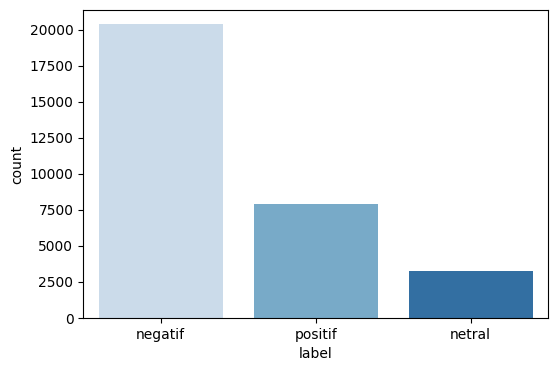

In [55]:
# Distribusi label (negatif,positif,netral)
plt.figure(figsize=(6,4))
sns.countplot(
    x="label",
    data=df_clean,
    order=df_clean["label"].value_counts().index,
    palette="Blues"
)

In [16]:
# stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


# slang map
slangwords = {
    "@":"di","abis":"habis","wtb":"beli","wts":"jual","wtt":"tukar","bgt":"banget",
    "maks":"maksimal","ga":"tidak","gak":"tidak","nggak":"tidak","engga":"tidak","tdk":"tidak"
}

# regex
RE_MENTION = re.compile(r'@[A-Za-z0-9_]+')
RE_HASHTAG = re.compile(r'#[A-Za-z0-9_]+')
RE_RT      = re.compile(r'\bRT\s+')
RE_URL     = re.compile(r'http\S+|www\.\S+')
RE_NUM     = re.compile(r'\d+')
RE_NONALPH = re.compile(r'[^\w\s]')

def clean_basic(text: str) -> str:
    if not isinstance(text, str): return ""
    t = RE_MENTION.sub('', text)
    t = RE_HASHTAG.sub('', t)
    t = RE_RT.sub('', t)
    t = RE_URL.sub('', t)
    t = RE_NUM.sub('', t)
    t = RE_NONALPH.sub(' ', t)
    t = t.replace('\n',' ').translate(str.maketrans('', '', string.punctuation))
    return t.lower().strip()

def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def tokenize(text):
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text


def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
# Mengubah huruf dalam teks menjadi huruf kecil
df_clean['text_clean'] = df_clean['content'].apply(clean_basic)

# Mengganti kata-kata slang dengan kata-kata standar
df_clean['text_slangwords'] = df_clean['text_clean'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata)
df_clean['text_tokenizingText'] = df_clean['text_slangwords'].apply(tokenize)

# Menghapus kata-kata stop (kata-kata umum)
df_clean['text_stopword'] = df_clean['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat
df_clean['text_akhir'] = df_clean['text_stopword'].apply(toSentence)

In [19]:
df_clean

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,label,text_clean,text_slangwords,text_tokenizingText,text_stopword,text_akhir
2,40e370ad-2183-4786-a3f0-49772cea7bdb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf Respon TokopediaCare Buruk!!! Lebih serin...,4,686,3.328.0,2025-09-05 03:12:13,"Halo Toppers, terima kasih atas rating yang ka...",2024-11-23 04:28:01,3.328.0,positif,maaf respon tokopediacare buruk lebih serin...,maaf respon tokopediacare buruk lebih sering d...,"[maaf, respon, tokopediacare, buruk, lebih, se...","[maaf, respon, tokopediacare, buruk, robot, ta...",maaf respon tokopediacare buruk robot tampilan...
4,099bae11-3fbf-4a75-8d7a-3d59ccdcbf10,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk tokopedia mohon untuk di perketat soal s...,4,4,3.328.0,2025-09-15 05:35:07,"Hai Toppers, Terima kasih untuk rating yang te...",2022-09-22 04:17:27,3.328.0,positif,untuk tokopedia mohon untuk di perketat soal s...,untuk tokopedia mohon untuk di perketat soal s...,"[untuk, tokopedia, mohon, untuk, di, perketat,...","[tokopedia, mohon, perketat, stok, barang, mar...",tokopedia mohon perketat stok barang market be...
13,87192777-615b-41ff-ad57-008cf627777c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,males belanja di toped ketika ada barang yg ti...,1,29,3.329.0,2025-09-09 23:57:12,"Halo Toppers, terima kasih atas rating yang ka...",2024-10-31 23:40:04,3.329.0,negatif,males belanja di toped ketika ada barang yg ti...,males belanja di toped ketika ada barang yg ti...,"[males, belanja, di, toped, ketika, ada, baran...","[males, belanja, toped, barang, yg, sesuai, re...",males belanja toped barang yg sesuai return su...
38,b3bb04f5-b41f-4a80-a917-c3d36ce44f5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tulisan nya plus gratis ongkir sepuasnya, eh p...",1,11,3.329.0,2025-09-11 06:16:33,"Halo Toppers, terima kasih atas rating yang ka...",2023-08-09 03:49:01,3.329.0,negatif,tulisan nya plus gratis ongkir sepuasnya eh p...,tulisan nya plus gratis ongkir sepuasnya eh pa...,"[tulisan, nya, plus, gratis, ongkir, sepuasnya...","[tulisan, plus, gratis, ongkir, sepuasnya, eh,...",tulisan plus gratis ongkir sepuasnya eh pas ce...
47,86982069-6df4-46a4-93fc-0443598f6d06,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gimana sih ini Tokopedia sekarang?Kelihatannya...,3,12,3.328.0,2025-09-10 11:03:59,Terima kasih sudah mempercayakan Tokopedia seb...,2024-09-02 13:00:21,3.328.0,netral,gimana sih ini tokopedia sekarang kelihatannya...,gimana sih ini tokopedia sekarang kelihatannya...,"[gimana, sih, ini, tokopedia, sekarang, keliha...","[gimana, tokopedia, kupon, voucher, kebanyakan...",gimana tokopedia kupon voucher kebanyakan dipa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80989,0b4f7906-0e1f-4c56-8041-e97ccc7c0314,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Smakin kesini kurang nyaman soal pe Ngiriman,,...",2,0,3.155,2021-12-19 02:10:20,"Hai Kak Jihan, maaf atas pengalaman bertransak...",2021-12-19 02:31:38,3.155,negatif,smakin kesini kurang nyaman soal pe ngiriman ...,smakin kesini kurang nyaman soal pe ngiriman k...,"[smakin, kesini, kurang, nyaman, soal, pe, ngi...","[smakin, kesini, nyaman, pe, ngiriman, kl, top...",smakin kesini nyaman pe ngiriman kl toped udah...
80990,8cfe536c-9c95-4c0e-897c-e766ebf24153,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah, terintegrasi lebih banyak, sangat memba...",5,0,3.195,2022-10-22 07:29:46,"Hai Toppers, Terima kasih untuk rating yang te...",2022-10-22 07:57:03,3.195,positif,mudah terintegrasi lebih banyak sangat memba...,mudah terintegrasi lebih banyak sangat membant...,"[mudah, terintegrasi, lebih, banyak, sangat, m...","[mudah, terintegrasi, membantu, mantap]",mudah terintegrasi membantu mantap
80996,d4a7afed-c0cc-47aa-940b-f94f1f25f8f3,Pengguna G

In [21]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [22]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''
    # Inisiasi polaritas

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'


    return score, polarity

In [61]:
results = df_clean['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df_clean['polarity_score'] = results[0]
df_clean['polarity'] = results[1]
print(df_clean['polarity'].value_counts())

polarity
negative    16305
positive    15240
Name: count, dtype: int64


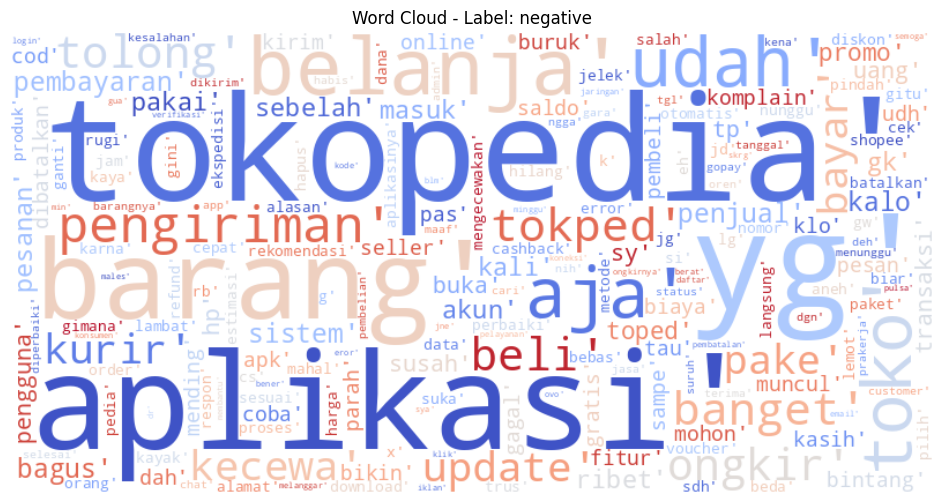

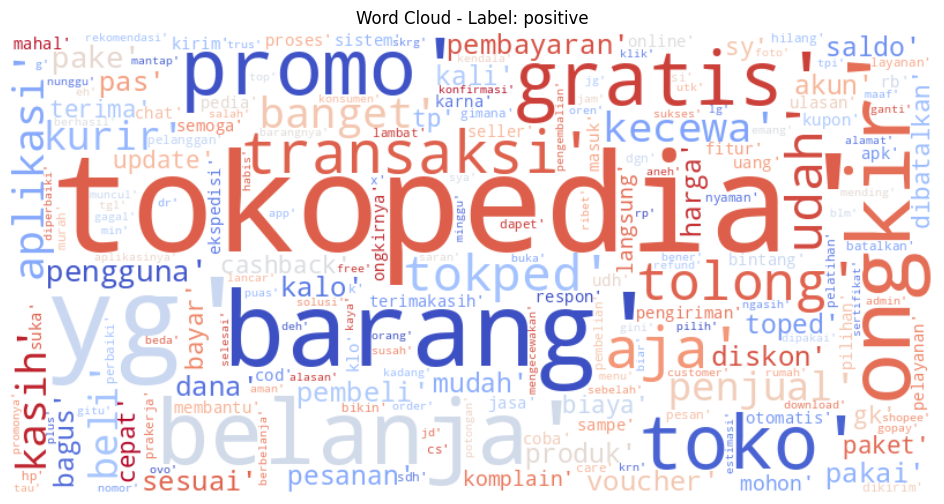

In [66]:
for label in df_clean["polarity"].unique():
    text = " ".join(df_clean[df_clean["polarity"] == label]["text_stopword"].astype(str))

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="coolwarm",
        collocations=False
    ).generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Label: {label}")
    plt.show()

In [24]:
df_clean

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,label,text_clean,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
2,40e370ad-2183-4786-a3f0-49772cea7bdb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf Respon TokopediaCare Buruk!!! Lebih serin...,4,686,3.328.0,2025-09-05 03:12:13,"Halo Toppers, terima kasih atas rating yang ka...",2024-11-23 04:28:01,3.328.0,positif,maaf respon tokopediacare buruk lebih serin...,maaf respon tokopediacare buruk lebih sering d...,"[maaf, respon, tokopediacare, buruk, lebih, se...","[maaf, respon, tokopediacare, buruk, robot, ta...",maaf respon tokopediacare buruk robot tampilan...,-8,negative
4,099bae11-3fbf-4a75-8d7a-3d59ccdcbf10,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk tokopedia mohon untuk di perketat soal s...,4,4,3.328.0,2025-09-15 05:35:07,"Hai Toppers, Terima kasih untuk rating yang te...",2022-09-22 04:17:27,3.328.0,positif,untuk tokopedia mohon untuk di perketat soal s...,untuk tokopedia mohon untuk di perketat soal s...,"[untuk, tokopedia, mohon, untuk, di, perketat,...","[tokopedia, mohon, perketat, stok, barang, mar...",tokopedia mohon perketat stok barang market be...,4,positive
13,87192777-615b-41ff-ad57-008cf627777c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,males belanja di toped ketika ada barang yg ti...,1,29,3.329.0,2025-09-09 23:57:12,"Halo Toppers, terima kasih atas rating yang ka...",2024-10-31 23:40:04,3.329.0,negatif,males belanja di toped ketika ada barang yg ti...,males belanja di toped ketika ada barang yg ti...,"[males, belanja, di, toped, ketika, ada, baran...","[males, belanja, toped, barang, yg, sesuai, re...",males belanja toped barang yg sesuai return su...,-9,negative
38,b3bb04f5-b41f-4a80-a917-c3d36ce44f5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tulisan nya plus gratis ongkir sepuasnya, eh p...",1,11,3.329.0,2025-09-11 06:16:33,"Halo Toppers, terima kasih atas rating yang ka...",2023-08-09 03:49:01,3.329.0,negatif,tulisan nya plus gratis ongkir sepuasnya eh p...,tulisan nya plus gratis ongkir sepuasnya eh pa...,"[tulisan, nya, plus, gratis, ongkir, sepuasnya...","[tulisan, plus, gratis, ongkir, sepuasnya, eh,...",tulisan plus gratis ongkir sepuasnya eh pas ce...,5,positive
47,86982069-6df4-46a4-93fc-0443598f6d06,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gimana sih ini Tokopedia sekarang?Kelihatannya...,3,12,3.328.0,2025-09-10 11:03:59,Terima kasih sudah mempercayakan Tokopedia seb...,2024-09-02 13:00:21,3.328.0,netral,gimana sih ini tokopedia sekarang kelihatannya...,gimana sih ini tokopedia sekarang kelihatannya...,"[gimana, sih, ini, tokopedia, sekarang, keliha...","[gimana, tokopedia, kupon, voucher, kebanyakan...",gimana tokopedia kupon voucher kebanyakan dipa...,11,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80989,0b4f7906-0e1f-4c56-8041-e97ccc7c0314,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Smakin kesini kurang nyaman soal pe Ngiriman,,...",2,0,3.155,2021-12-19 02:10:20,"Hai Kak Jihan, maaf atas pengalaman bertransak...",2021-12-19 02:31:38,3.155,negatif,smakin kesini kurang nyaman soal pe ngiriman ...,smakin kesini kurang nyaman soal pe ngiriman k...,"[smakin, kesini, kurang, nyaman, soal, pe, ngi...","[smakin, kesini, nyaman, pe, ngiriman, kl, top...",smakin kesini nyaman pe ngiriman kl toped udah...,2,positive
80990,8cfe536c-9c95-4c0e-897c-e766ebf24153,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah, terintegrasi lebih banyak, sangat memba...",5,0,3.195,2022-10-22 07:29:46,"Hai Toppers, Terima kasih untuk rating yang te...",2022-10-22 07:57:03,3.195,positif,mudah terintegrasi lebih banyak sangat memba...,mudah terintegrasi lebih banyak sangat membant...,"[mudah, terintegrasi, lebih, banyak, sangat, m...","[mudah, terintegrasi, memban

# 4. Skema 1 ( SVM + TF-IDF )

In [25]:
# Train/Test Split
X = df_clean["text_akhir"].values
y = df_clean["polarity"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=59,
    stratify=y
)
print(len(X_train), len(X_test))

25236 6309


In [29]:
pipeline = make_pipeline(
    TfidfVectorizer(
        max_features=30000,
        min_df=17,
        max_df=0.8
    ),
    LinearSVC(random_state=59)
)

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.8, max_features=30000, min_df=17)),
                ('linearsvc', LinearSVC(random_state=59))])

In [31]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 92.71 %
              precision    recall  f1-score   support

    negative      0.926     0.933     0.930      3261
    positive      0.928     0.921     0.924      3048

    accuracy                          0.927      6309
   macro avg      0.927     0.927     0.927      6309
weighted avg      0.927     0.927     0.927      6309

Confusion matrix:
 [[3043  218]
 [ 242 2806]]


# 5. Skema 2 ( Logistic Regression + BoW)

In [32]:
X = df_clean["text_akhir"].values
y = df_clean["polarity"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=59,
    stratify=y
)

In [50]:
pipe_lr = Pipeline([
    ("vect", CountVectorizer(max_features=30000, ngram_range=(1,2))),
    ("clf", LogisticRegression(
        max_iter=2000,
        n_jobs=-1,
        solver="saga"
    ))
])

In [51]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=30000, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(max_iter=2000, n_jobs=-1, solver='saga'))])

In [52]:
y_pred = pipe_lr.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 90.88 %

Classification Report:
              precision    recall  f1-score   support

    negative      0.913     0.910     0.912      4892
    positive      0.904     0.907     0.906      4572

    accuracy                          0.909      9464
   macro avg      0.909     0.909     0.909      9464
weighted avg      0.909     0.909     0.909      9464



In [69]:
pip freeze > requirements.txt
